# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [2]:
# Load the dataset to pandas
# url = "https://raw.githubusercontent.com/tanuj-public/datasets/refs/heads/master/vehicles.csv"
df = pd.read_csv("data/vehicles.csv")

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

The objective of this project is to identify the key factors that drive the price of a car. This involves analyzing various attributes of vehicles, such as their make, model, year, mileage, and other features, to determine how they impact the vehicle's price.


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [3]:
print("Number of rows and columns:", df.shape)

# Get the column names
print("Column names:", df.columns)

# Check for missing values
print("Missing values count:\n", df.isnull().sum())

# Get the data types of each column
print("Data types:\n", df.dtypes)

# Get summary statistics
print("Summary statistics:\n", df.describe())

Number of rows and columns: (426880, 18)
Column names: Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')
Missing values count:
 id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64
Data types:
 id                int64
region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_

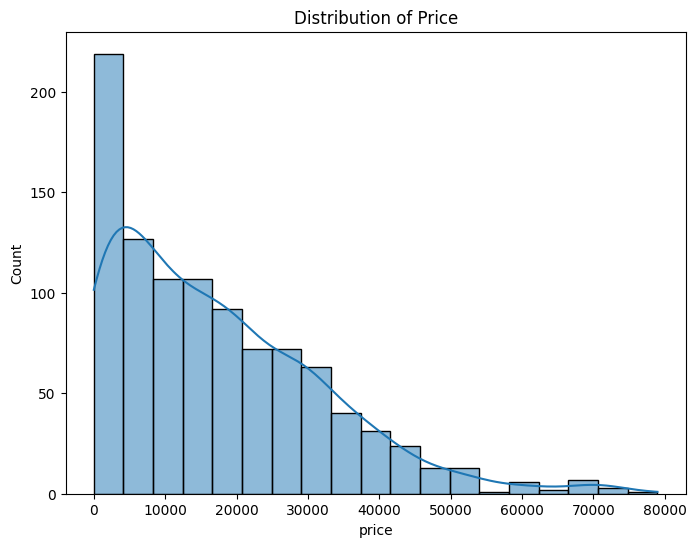

In [4]:
# try to understand the whole dataset might cause issue with the system so trying to understand a bit with sub-set of the data.
# Sample 1000 rows from the dataset
sample_df = df.sample(n=1000)

# Plot the distribution of the target variable (price)
plt.figure(figsize=(8,6))
sns.histplot(sample_df['price'], kde=True)
plt.title('Distribution of Price')
plt.show()

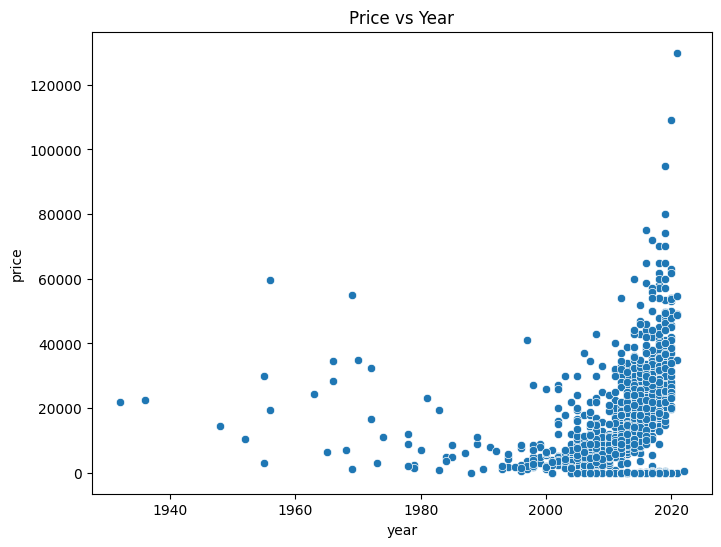

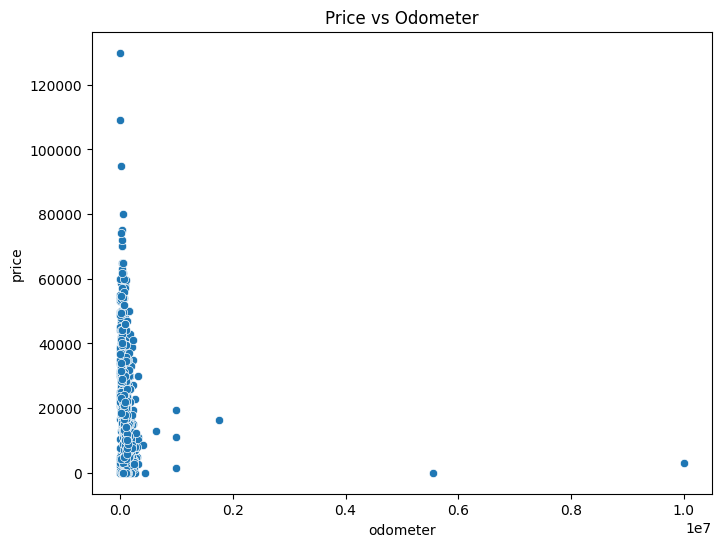

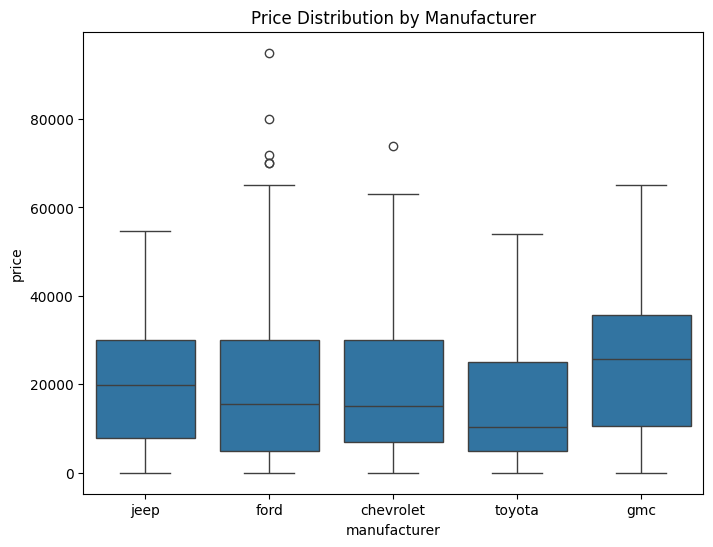

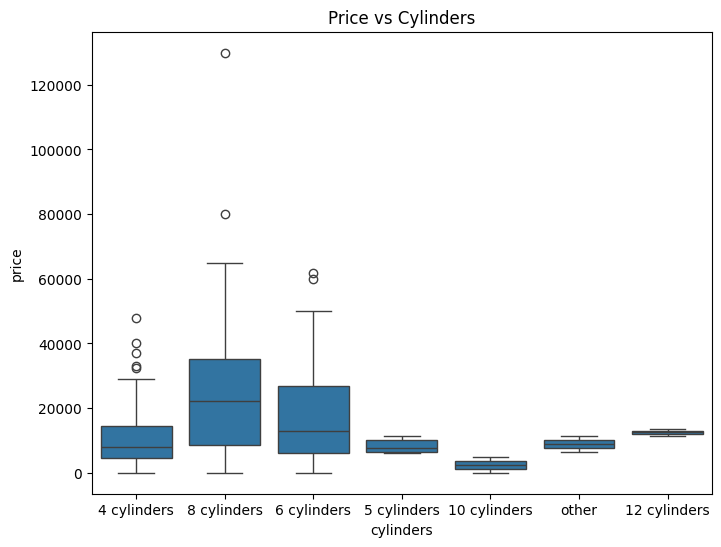

In [5]:
# Sample 1000 rows from the dataset
sample_df = df.sample(n=1000)

# Plot the relationship between price and year
plt.figure(figsize=(8,6))
sns.scatterplot(x='year', y='price', data=sample_df)
plt.title('Price vs Year')
plt.show()

# Plot the relationship between price and odometer
plt.figure(figsize=(8,6))
sns.scatterplot(x='odometer', y='price', data=sample_df)
plt.title('Price vs Odometer')
plt.show()

# Plot the distribution of price by manufacturer (top 5)
top_manufacturers = sample_df['manufacturer'].value_counts().head(5).index
sample_df_top = sample_df[sample_df['manufacturer'].isin(top_manufacturers)]
plt.figure(figsize=(8,6))
sns.boxplot(x='manufacturer', y='price', data=sample_df_top)
plt.title('Price Distribution by Manufacturer')
plt.show()

# Plot the relationship between price and cylinders
plt.figure(figsize=(8,6))
sns.boxplot(x='cylinders', y='price', data=sample_df)
plt.title('Price vs Cylinders')
plt.show()

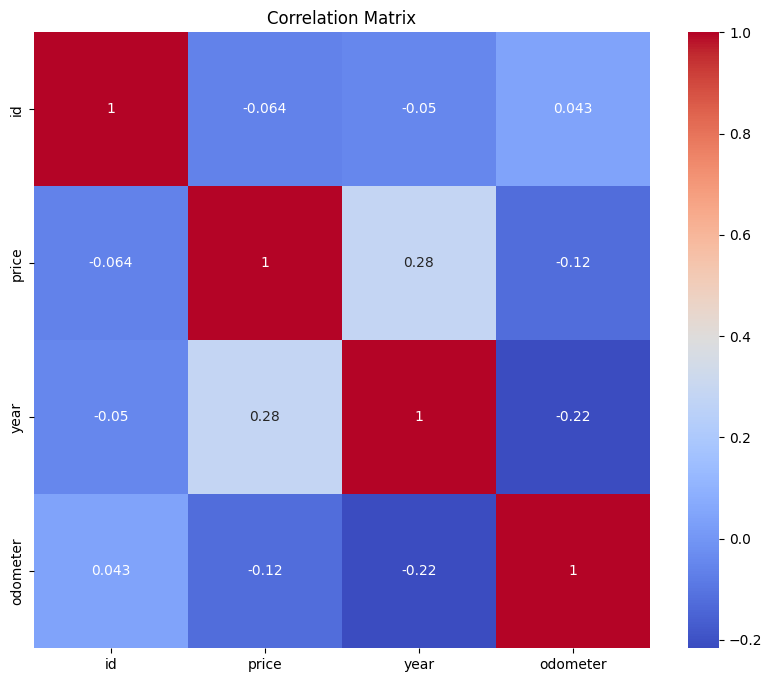

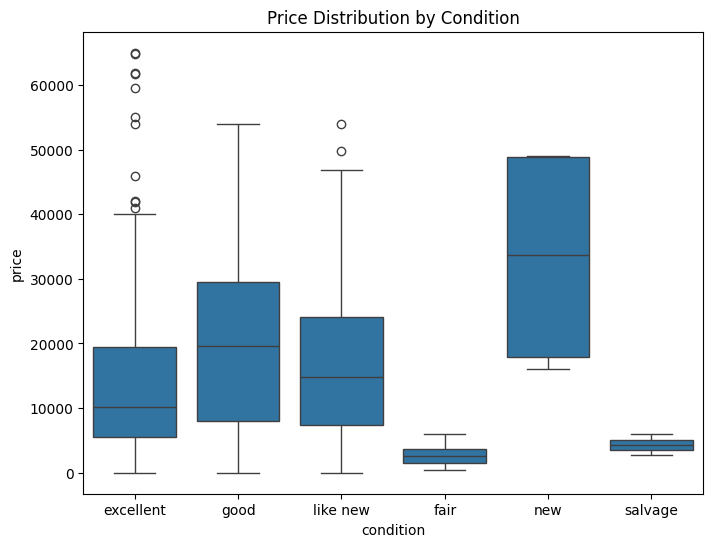

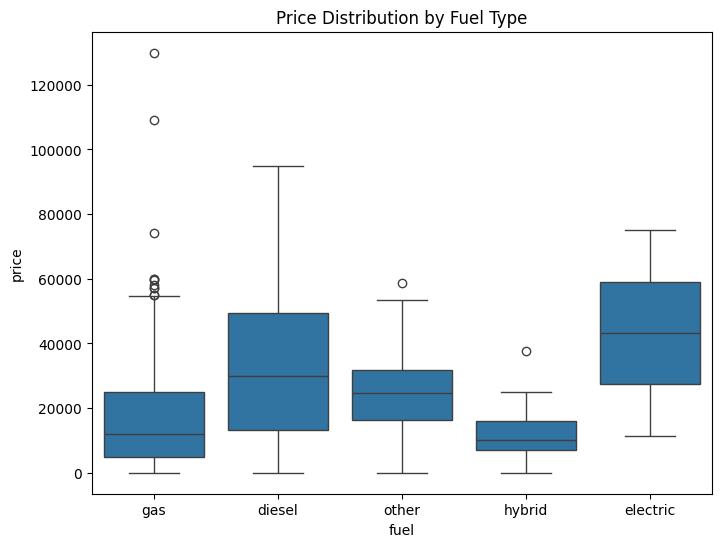

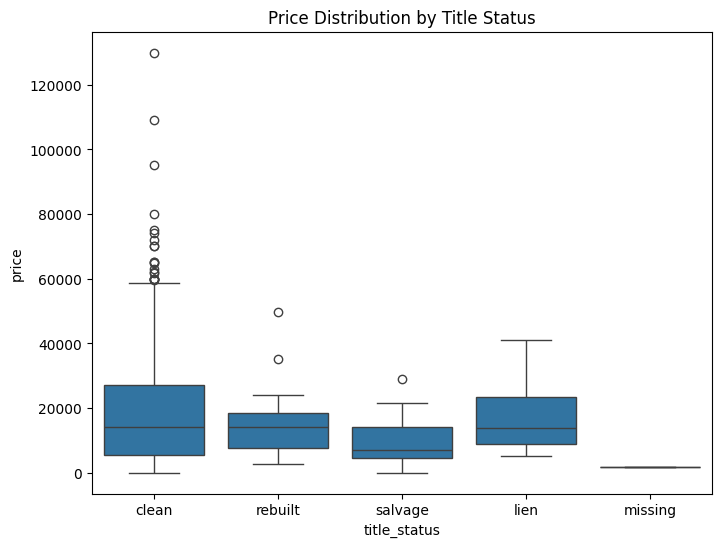

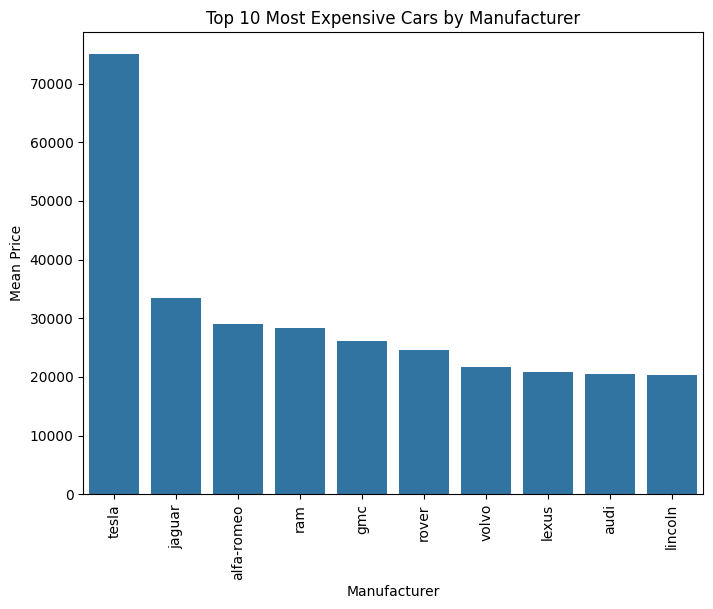

In [6]:
# Plot the correlation matrix
corr_matrix = sample_df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Plot the price distribution by condition
plt.figure(figsize=(8,6))
sns.boxplot(x='condition', y='price', data=sample_df)
plt.title('Price Distribution by Condition')
plt.show()

# Plot the price distribution by fuel type
plt.figure(figsize=(8,6))
sns.boxplot(x='fuel', y='price', data=sample_df)
plt.title('Price Distribution by Fuel Type')
plt.show()

# Plot the relationship between price and title status
plt.figure(figsize=(8,6))
sns.boxplot(x='title_status', y='price', data=sample_df)
plt.title('Price Distribution by Title Status')
plt.show()

# Plot the top 10 most expensive cars by manufacturer
top_10_expensive = sample_df.groupby('manufacturer')['price'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,6))
sns.barplot(x=top_10_expensive.index, y=top_10_expensive.values)
plt.title('Top 10 Most Expensive Cars by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Mean Price')
plt.xticks(rotation=90)
plt.show()

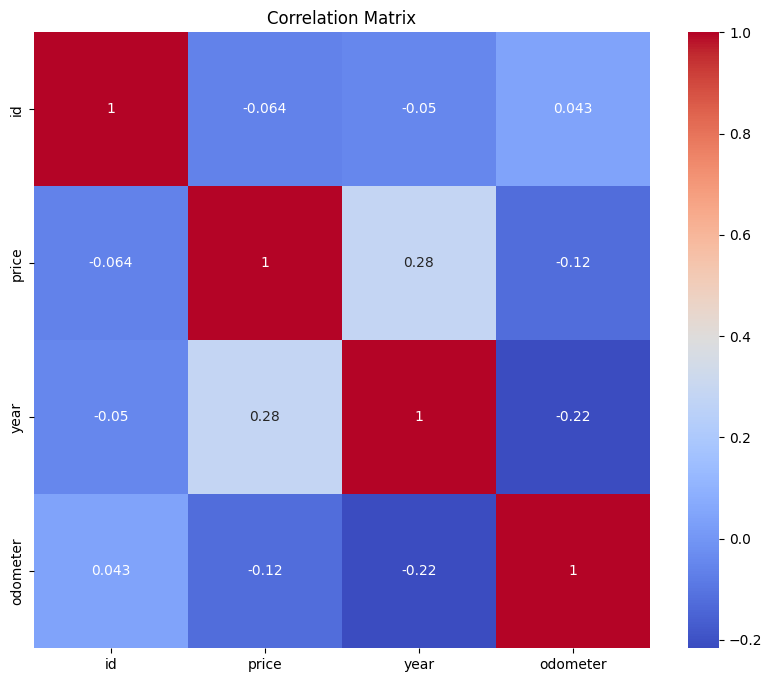

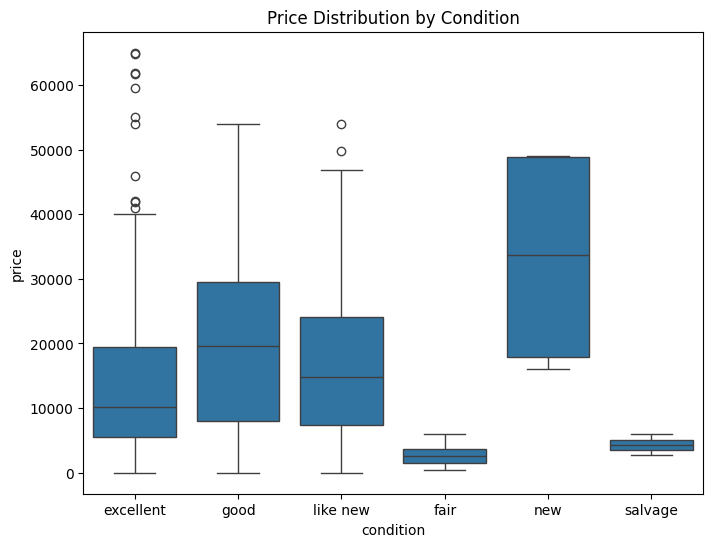

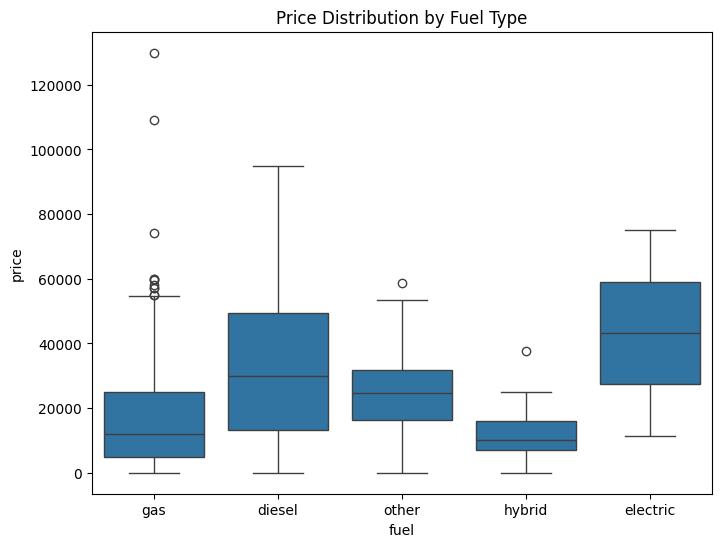

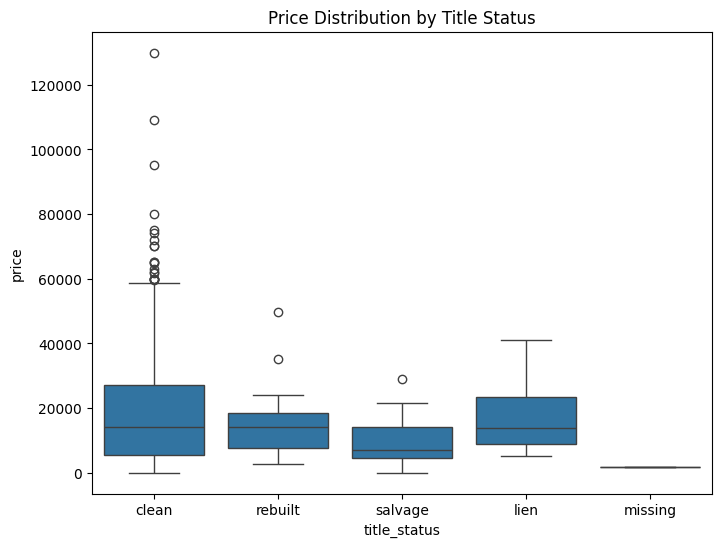

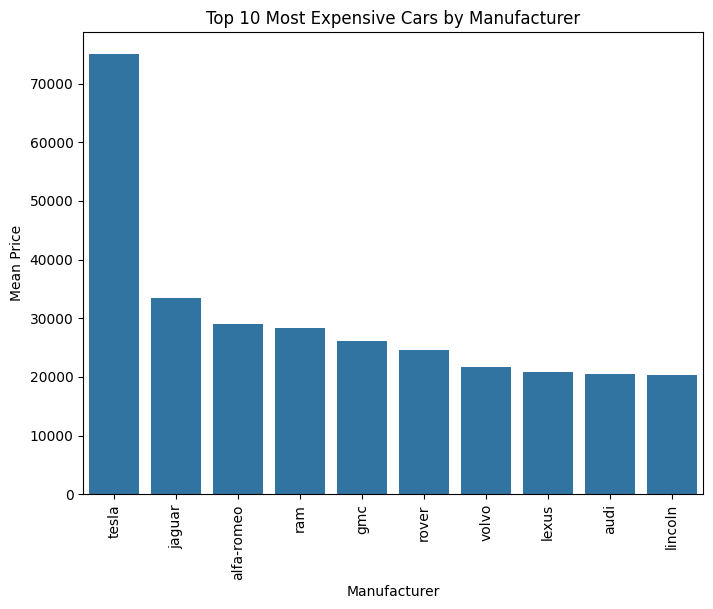

In [7]:
# Plot the correlation matrix
corr_matrix = sample_df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Plot the price distribution by condition
plt.figure(figsize=(8,6))
sns.boxplot(x='condition', y='price', data=sample_df)
plt.title('Price Distribution by Condition')
plt.show()

# Plot the price distribution by fuel type
plt.figure(figsize=(8,6))
sns.boxplot(x='fuel', y='price', data=sample_df)
plt.title('Price Distribution by Fuel Type')
plt.show()

# Plot the relationship between price and title status
plt.figure(figsize=(8,6))
sns.boxplot(x='title_status', y='price', data=sample_df)
plt.title('Price Distribution by Title Status')
plt.show()

# Plot the top 10 most expensive cars by manufacturer
top_10_expensive = sample_df.groupby('manufacturer')['price'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,6))
sns.barplot(x=top_10_expensive.index, y=top_10_expensive.values)
plt.title('Top 10 Most Expensive Cars by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Mean Price')
plt.xticks(rotation=90)
plt.show()

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [8]:
# find the missing 
print(sample_df.isnull().sum())

id                0
region            0
price             0
year              6
manufacturer     44
model             9
condition       407
cylinders       412
fuel              2
odometer         13
title_status     10
transmission      7
VIN             406
drive           284
size            699
type            220
paint_color     283
state             0
dtype: int64


For columns with a large number of missing values (e.g. condition, cylinders, size, drive, VIN, paint_color, type), dropping the missing ones.
For columns with a smaller number of missing values (e.g. year, manufacturer, model, fuel, odometer, title_status), replacing them with median.

In [12]:
# Drop columns with a large number of missing values
drop_cols = ['VIN', 'drive', 'size', 'paint_color', 'type']
sample_df = sample_df.drop(drop_cols, axis=1)

# Impute missing values in condition with 'unknown'
sample_df['condition'] = sample_df['condition'].fillna('unknown')

# Impute missing values in cylinders with the most frequent value
sample_df['cylinders'] = sample_df['cylinders'].fillna(sample_df['cylinders'].mode()[0])

# Impute missing values in other columns with the most frequent value
cols_to_impute = ['year', 'manufacturer', 'model', 'fuel', 'odometer', 'title_status']
for col in cols_to_impute:
    sample_df[col] = sample_df[col].fillna(sample_df[col].mode()[0])


After handling missing values, encoding categorical variables and scaling numerical variables.

In [13]:
# One-hot encoding for categorical variables
categorical_cols = ['fuel', 'title_status', 'condition', 'manufacturer', 'model']
sample_df = pd.get_dummies(sample_df, columns=categorical_cols)

# Scaling numerical variables
numerical_cols = ['year', 'odometer']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sample_df[numerical_cols] = scaler.fit_transform(sample_df[numerical_cols])

In [14]:
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df_filtered

# Remove outliers in 'price' and 'odometer'
df = remove_outliers_iqr(df, 'price')
df = remove_outliers_iqr(df, 'odometer')

print("Outliers in 'price' and 'odometer' handled.")

Outliers in 'price' and 'odometer' handled.


In [15]:
print(df)

                id   region  price    year manufacturer  \
27      7316814884   auburn  33590  2014.0          gmc   
28      7316814758   auburn  22590  2010.0    chevrolet   
29      7316814989   auburn  39590  2020.0    chevrolet   
30      7316743432   auburn  30990  2017.0       toyota   
31      7316356412   auburn  15000  2013.0         ford   
...            ...      ...    ...     ...          ...   
426875  7301591192  wyoming  23590  2019.0       nissan   
426876  7301591187  wyoming  30590  2020.0        volvo   
426877  7301591147  wyoming  34990  2020.0     cadillac   
426878  7301591140  wyoming  28990  2018.0        lexus   
426879  7301591129  wyoming  30590  2019.0          bmw   

                           model  condition    cylinders    fuel  odometer  \
27      sierra 1500 crew cab slt       good  8 cylinders     gas   57923.0   
28                silverado 1500       good  8 cylinders     gas   71229.0   
29           silverado 1500 crew       good  8 cylinders 

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer  # Import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np  # Import numpy

# Separate features (X) and target variable (y)
X = df.drop('price', axis=1)
y = df['price']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Create transformers for preprocessing
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute numerical NaNs with mean
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Impute categorical NaNs
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply the preprocessing to the training and testing data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# --- IMPUTE ANY REMAINING NaNs ---
imputer = SimpleImputer(strategy='constant', fill_value=0)  # Or 'mean', 'median' etc.
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
# ---------------------------------

print("Data preprocessed and split for modeling.")

# Initialize the Linear Regression model
model = LinearRegression()

# Perform cross-validation on the preprocessed training data
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

# Train the model on the entire preprocessed training data
model.fit(X_train, y_train)

# Make predictions on the preprocessed test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model:")
print(f"Cross-Validation R-squared scores: {cv_scores}")
print(f"Mean Cross-Validation R-squared: {cv_scores.mean()}")
print(f"Test Set Mean Squared Error: {mse}")
print(f"Test Set R-squared: {r2}")

Data preprocessed and split for modeling.


In [22]:
# Get the coefficients of the linear regression model
coefficients = model.coef_

# Get the feature names after preprocessing
feature_names = preprocessor.get_feature_names_out()

# Create a DataFrame to display coefficients with feature names
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute value of the coefficients
coef_df['Abs_Coefficient'] = abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)

# Print the sorted coefficients
print(coef_df.to_markdown(index=False, numalign="left", stralign="left"))

AttributeError: 'LinearRegression' object has no attribute 'coef_'

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.